# Homework \#2, APPM 4600
## Problem 1

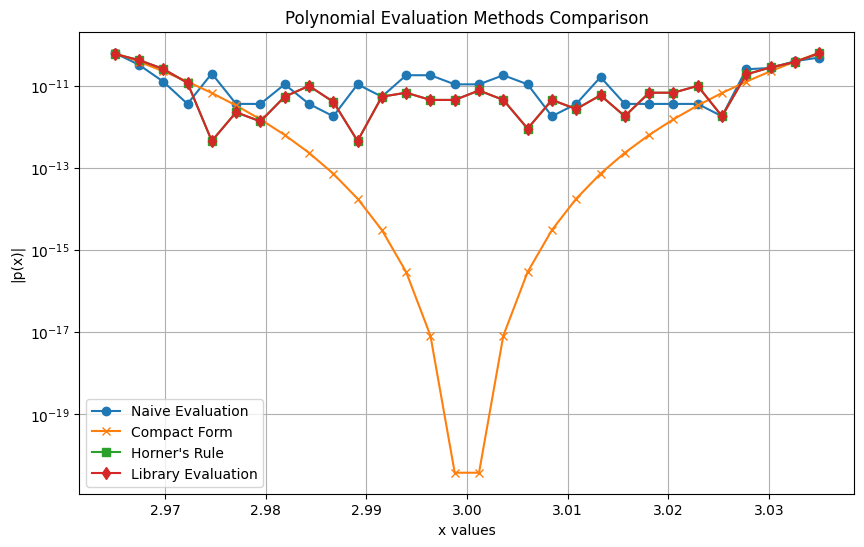

In [ ]:
"""
Problem 1: Consider the polynomial p(x) = (x - 3)^7 = x^7 - 21x^6 + 189x^5 - 945x^4 + 2835x^3 - 5103x^2 + 5103x - 2187.
Note: you can get these coefficients using Matlab's poly or Python's numpy.poly and specifying
that 3 is a root with multiplicity 7; this saves you having to type them in.
a) Produce a plot that shows the evaluation of p for 30 equispaced points in the range
    [2.965, 3.035], using the following 4 algorithms for evaluating a polynomial (overlay all
    4 results on the same plot, and label the plot nicely):
    i. Make your own algorithm to naively evaluate the polynomial using its coefficients.
        Ideally, your code should work for an arbitrary polynomial that is given to you as a list
        of coefficients, but for this problem you could just hardcode in our specific polynomial
        if you want.
    ii. Use the compact form p(x) = (x - 3)^7
    iii. Implement Horner's rule. Again, ideally, your code should work for an arbitrary poly-
        nomial that is given to you as a list of coefficients, but for this problem you could just
        hardcode in our specific polynomial if you need to.
    iv. Use a software library (e.g., Matlab's polyval or Python's numpy.polyval or numpy.polynomial
        library). You are encouraged to look at the documentation for these libraries.
"""
import numpy as np
import matplotlib.pyplot as plt

# Coefficients of the polynomial p(x) = (x - 3)^7
coefficients = [1, -21, 189, -945, 2835, -5103, 5103, -2187]

def naive_evaluation(x, coeffs): # Just evaluate using coefficients
    result = 0
    degree = len(coeffs) - 1
    for i, coeff in enumerate(coeffs):
        result += coeff * (x ** (degree - i))
    return result

def compact_form(x): # Evaluate using the compact form (x - 3)^7
    return (x - 3) ** 7

def horners_rule(x, coeffs): # Evaluate with an implementation of Horner's rule
    result = coeffs[0]
    for coeff in coeffs[1:]:
        result = result * x + coeff
    return result

def library_evaluation(x, coeffs): # Evaluate using numpy's polyval, should be the most stable
    return np.polyval(coeffs, x)

# Generate 30 equispaced points in the range [2.965, 3.035]
x_values = np.linspace(2.965, 3.035, 30)

# Evaluate the polynomial using the four methods, taking absolute values for better visualization
naive_results = [abs(naive_evaluation(x, coefficients)) for x in x_values]
compact_results = [abs(compact_form(x)) for x in x_values]
horner_results = [abs(horners_rule(x, coefficients)) for x in x_values]
library_results = [abs(library_evaluation(x, coefficients)) for x in x_values]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, naive_results, label='Naive Evaluation', marker='o')
plt.plot(x_values, compact_results, label='Compact Form', marker='x')
plt.plot(x_values, horner_results, label="Horner's Rule", marker='s')
plt.plot(x_values, library_results, label='Library Evaluation', marker='d')
plt.yscale('log')  # Use logarithmic scale for better visibility
plt.title('Polynomial Evaluation Methods Comparison')
plt.xlabel('x values')
plt.ylabel('|p(x)|')
plt.legend()
plt.grid()
plt.show()

b - Comment on the similarities and differences, and discuss which algorithm you think is most correct, and what possible sources of numerical error might be.

The Horner's Rule and library evaluation match exactly the same. This is probably becuase the library evaluation uses Horner's rule. The compact form works extremely poorly as $x\rightarrow 3$, since the subtractive cancellation becomes more and more problematic. The naieve evaluation is more accurate than the compact form, but still isn't as accurate as the Horner's rule and library evaluation form. 

Each algorithm appears to asymptotically appraoch the same values as $x$ leaves the $[2.97, 3.03]$ domain, most likely due to the fact that the only problematic region is around $x=3$ from the subtractive cancellation. This is the behavior we would expect from an algorithm becoming unstable around a point!